### Keras RNN Example

RNNs process sequences by iterating through their elements and maintaining a state containing information relatative to what it has seen so far.

RNNs have an internal loop. The state of the RNN is reset between processing two different, independent sequences e.g. two different movie reviews. A sequence is considered as a single data point. But that very data point is not processed in a single step, rather in an interative way. 

###### RNN Forward Pass with Numpy

In [2]:
import numpy as np

In [3]:
timesteps=100
input_features=32
output_features=64

In [4]:
inputs = np.random.random((timesteps, input_features))

In [6]:
state_t = np.zeros((output_features,))

In [7]:
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

In [8]:
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t

In [13]:
final_output_sequence = np.concatenate(successive_outputs, axis=0)

###### Simple RNN in Keras

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

In [21]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


The return_sequences parameter is very important. It determines whether if the SimpleRNN layer returns the full sequences of outputs for each timestep or only the last output for each input sequence

In [22]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Setting the parameter to True is essential if you are using a SimpleRNN as an inner layer in the NN:

In [24]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) #notice the output layer does not have the parameter set to True
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
Total params: 330,400
Trainable params: 330,400
Non-trainable params: 0
_________________________________________________________________


Movie Review Example

In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [26]:
max_features=10000
maxlen=500
batch_size=32

In [27]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [28]:
#Padding sequences:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [29]:
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [32]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/Applications/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.6942 - acc: 0.5342 - val_loss: 0.6782 - val_acc: 0.5666
Epoch 2/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.6600 - acc: 0.5965 - val_loss: 0.6554 - val_acc: 0.5988
Epoch 3/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.6049 - acc: 0.6651 - val_loss: 0.6862 - val_acc: 0.5942
Epoch 4/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.5514 - acc: 0.7198 - val_loss: 0.5503 - val_acc: 0.7264
Epoch 5/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.5047 - acc: 0.7545 - val_loss: 0.6853 - val_acc: 0.6462
Epoch 6/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.4737 - acc: 0.7769 - val_loss: 0.5938 - val_acc: 0.7116
Epoch 7/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.4483 - acc: 0.7972 - val_loss: 0.6007 - val_acc:

In [33]:
import matplotlib.pyplot as plt

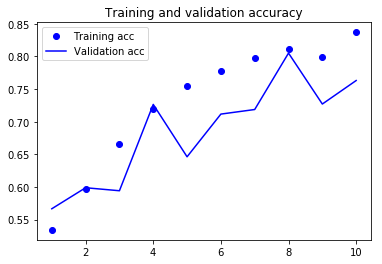

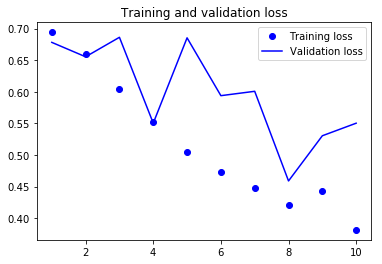

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()